In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M

sys.path.append(r'G:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import time
import random

In [2]:
comp = {'SiO2_Liq': 51.6, #76.51,
       'TiO2_Liq': 1.06, #0.09,
       'Al2O3_Liq': 16.3, #12.23,
       'FeOt_Liq': 1.8, #0.97,
       'MgO_Liq': 6.5, #0.06,
       'CaO_Liq': 9.89, #0.81,
       'Na2O_Liq': 2.18, #4.32,
       'K2O_Liq': 0.44, #4.78,
       'H2O_Liq': 1.60,
       'CO2_Liq': 0.0,
       'Fe3Fet_Liq': 0.25}

In [3]:
P_bar = np.linspace(500, 10000, 20)
phases = ['plagioclase1', 'clinopyroxene1', 'orthopyroxene1']
Results = M.findSaturationPressure(comp = comp, 
                                   Model = "MELTSv1.0.2", 
                                   cores = 20,
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 1100,
                                   dt_C = 50, 
                                   T_step_C = 1, 
                                   T_cut_C = 10,
                                   find_min = True)

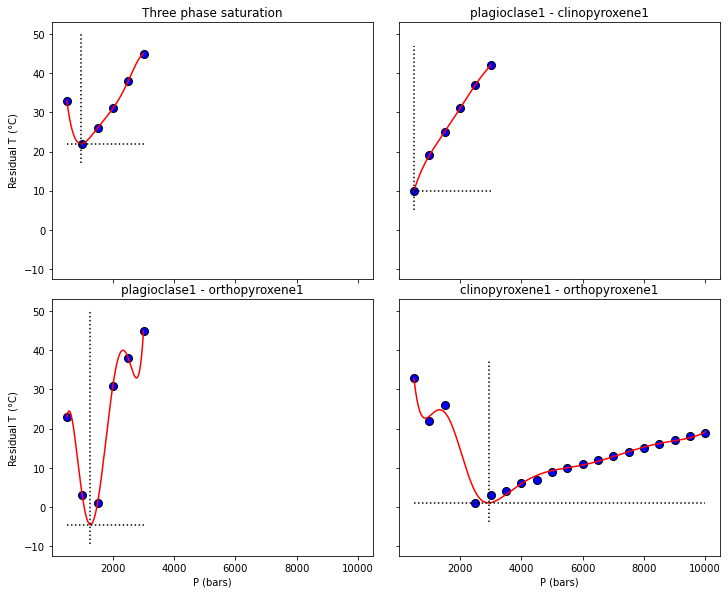

In [4]:
M.residualT_plot(Results = Results, P_bar = P_bar, phases = phases)

In [5]:
H2O_Liq = np.linspace(0.1, 2.5, 6)
Results = M.findSaturationPressure(comp = comp, 
                                   Model = "MELTSv1.0.2", 
                                   cores = 20,
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 1100,
                                   dt_C = 30, 
                                   T_step_C = 1, 
                                   T_cut_C = 12,
                                   H2O_Liq = H2O_Liq,
                                   find_min = True)

  0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\mattg\anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:1176: UserWarning: 
The required storage space exceeds the available storage space: nxest
or nyest too small, or s too small.
The weighted least-squares spline corresponds to the current set of
knots.
  warnings.warn(message)


In [6]:
Results['CurveMin']

{'Res_abc': {'Res_min': 4.118201980807951,
  'P_min': 2526.315789473684,
  'H2O_min': 0.5658048543903063,
  'z_new': <scipy.interpolate.fitpack2.SmoothBivariateSpline at 0x2bf5b12d940>,
  'test': 'Pass'},
 'Res_bc': {'Res_min': 1.4005701764066851,
  'P_min': 2578.9473684210525,
  'H2O_min': 2.5279031547591346,
  'z_new': <scipy.interpolate.fitpack2.SmoothBivariateSpline at 0x2bf5b53de20>,
  'test': 'Pass'},
 'Res_ab': {'Res_min': 1.6183129428348313,
  'P_min': 2947.3684210526317,
  'H2O_min': 0.4396312623529609,
  'z_new': <scipy.interpolate.fitpack2.SmoothBivariateSpline at 0x2bf5b53dcd0>,
  'test': 'Pass'},
 'Res_ac': {'Res_min': 0.08966124426870659,
  'P_min': 1263.157894736842,
  'H2O_min': 1.660379731129211,
  'z_new': <scipy.interpolate.fitpack2.SmoothBivariateSpline at 0x2bf5b0a8be0>,
  'test': 'Pass'}}

In [7]:
%matplotlib
M.residualT_plot(Results = Results, P_bar = P_bar, phases = phases, H2O_Liq = H2O_Liq)

Using matplotlib backend: Qt5Agg


In [8]:
Fe3Fet_Liq = np.linspace(0.1, 0.4, 3)
Results = M.findSaturationPressure(comp = comp, 
                                   Model = "MELTSv1.0.2", 
                                   cores = 20,
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 1100,
                                   dt_C = 60, 
                                   T_step_C = 1, 
                                   T_cut_C = 12,
                                   H2O_Liq = H2O_Liq,
                                   Fe3Fet_Liq = Fe3Fet_Liq,
                                   find_min = True)

In [9]:
Results['CurveMin']

{'Res_ab': {'Res_min': -138.88643277826696,
  'P_min': 6907.035175879397,
  'H2O_min': 0.8289098746728222,
  'z_new': <scipy.interpolate.fitpack2.SmoothBivariateSpline at 0x1f20361c3a0>,
  'Fe3Fet_Liq': 0.25,
  'test': 'Pass'},
 'Res_bc': {'Res_min': 0.7002359507244598,
  'P_min': 3507.5376884422108,
  'H2O_min': 0.3459808798554714,
  'z_new': <scipy.interpolate.fitpack2.SmoothBivariateSpline at 0x1f20361c280>,
  'Fe3Fet_Liq': 0.4,
  'test': 'Pass'},
 'Res_ac': {'Res_min': -10058.685095890707,
  'P_min': 8572.864321608042,
  'H2O_min': 0.2475487172632485,
  'z_new': <scipy.interpolate.fitpack2.SmoothBivariateSpline at 0x1f20361c6d0>,
  'Fe3Fet_Liq': 0.4,
  'test': 'Pass'},
 'Res_abc': {'Res_min': -1088.1645857628503,
  'P_min': 8572.864321608042,
  'H2O_min': 0.25475014271166985,
  'z_new': <scipy.interpolate.fitpack2.SmoothBivariateSpline at 0x1f20361c5e0>,
  'Fe3Fet_Liq': 0.25,
  'test': 'Pass'}}

In [9]:
M.residualT_plot(Results = Results, P_bar = P_bar, phases = phases, H2O_Liq = H2O_Liq, Fe3Fet_Liq = Fe3Fet_Liq)


In [36]:
Results['Res_abc'][:,2,5]

array([12.,  6., 20., 35., nan, nan, nan, nan])

In [45]:
from scipy.interpolate import RegularGridInterpolator
x, y, z = np.meshgrid(Fe3Fet_Liq, H2O_Liq, P_bar)
interp = RegularGridInterpolator((H2O_Liq, Fe3Fet_Liq, P_bar), Results['Res_abc'])

In [47]:
interp(np.array([[1.2, 0.4, 6000]]))

array([nan])

In [42]:
from scipy.spatial import ConvexHull
points = np.array([[H2O_Liq], [Fe3Fet_Liq], [P_bar]])
ConvexHull(points)

C:\Users\mattg\AppData\Local\Temp/ipykernel_29876/615119538.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  points = np.array([[H2O_Liq], [Fe3Fet_Liq], [P_bar]])


ValueError: setting an array element with a sequence.

numpy.ndarray